# First

In [9]:
!wget https://bit.ly/fruits_300_data

--2025-10-30 04:35:53--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-10-30 04:35:53--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-10-30 04:35:54--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
fruits = np.load("./fruits_300_data")

In [12]:
fruits.shape

(300, 100, 100)

In [13]:
fruits[0, 0, :] # N, H, W

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

0에 가까울 수록 검고, 255에 가까울수록 밝다.

0은 모델의 출력값을 0으로 만들어 버리므로, 중요하지 않은 바탕을 255로 설정하면 모델이 바탕에 집중하고, 사과에 집중하지 않게 된다.

즉, 중요한 특성엔 높은 값을 주는 것이 좋다.

따라서 배열은 바탕을 검게, 사과를 하얗게 보이도록 설정되어 있다.

우리 눈에 보이는 진짜 사과는 흑백을 반전시켜야 한다.

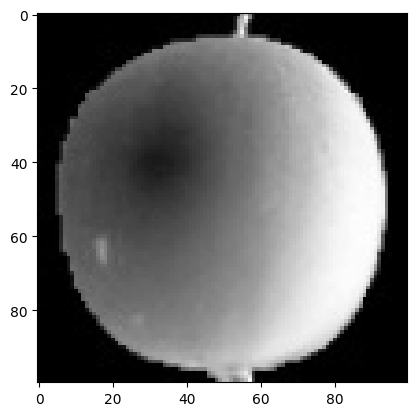

In [14]:
plt.imshow(fruits[0], cmap="gray")
plt.show()

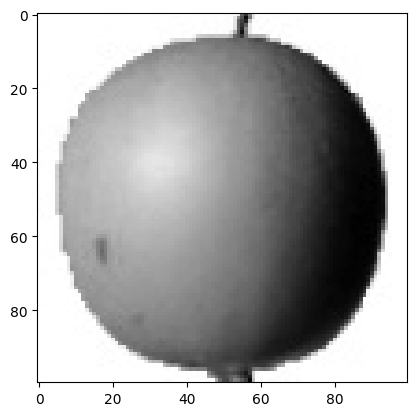

In [15]:
plt.imshow(fruits[0], cmap="gray_r")
plt.show()

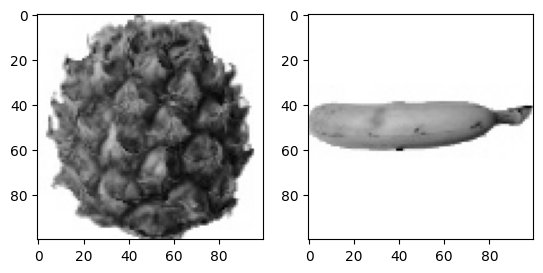

In [16]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(fruits[100], cmap="gray_r")
ax[1].imshow(fruits[200], cmap="gray_r")
plt.show()

In [17]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

apple.shape

(100, 10000)

In [18]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

pixel 평균 값을 시각화한다.

사과나 파인애플은 객체의 크기가 크다 -> 255에 가까운 값들이 많다.
 -> 픽셀의 평균값이 크다.

 반면 바나나는 픽셀의 평균값이 작으니 두 집단이 분리된다.

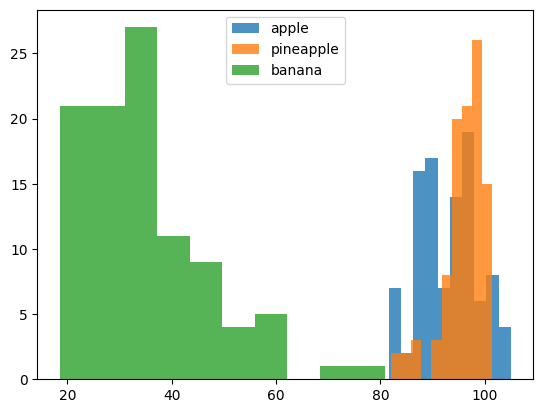

In [19]:
plt.hist(np.mean(apple, axis=1), alpha=0.8) # alpha는 투명도
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(["apple", "pineapple", "banana"])
plt.show()

샘플의 평균값 보다 픽셀의 평균값에 주목해 시각화 해보기

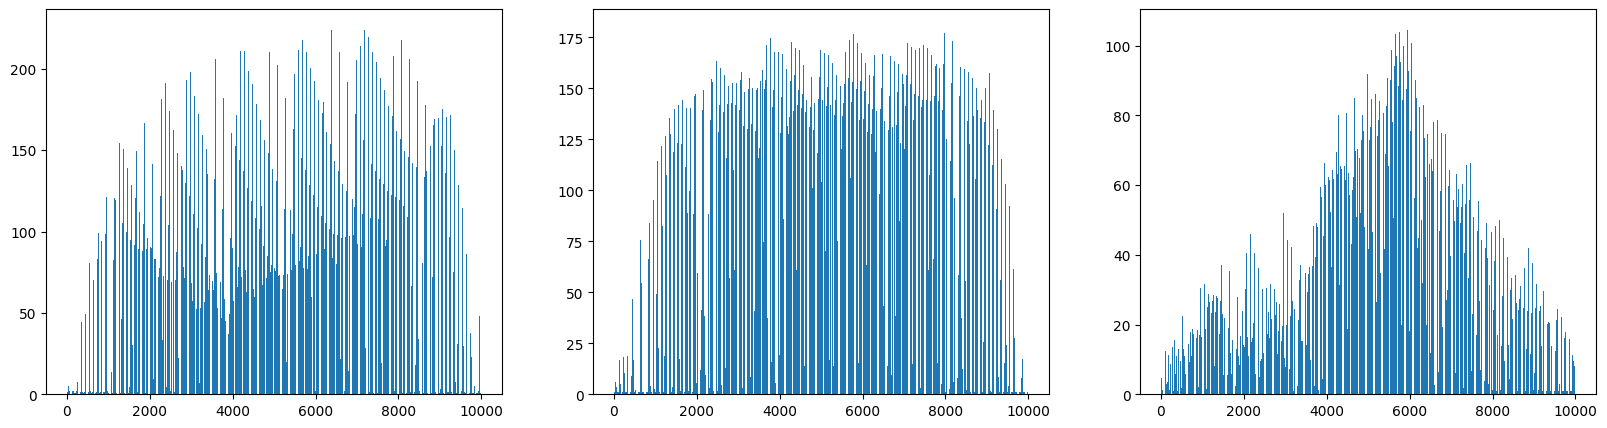

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].bar(range(10000), np.mean(apple, axis=0))
ax[1].bar(range(10000), np.mean(pineapple, axis=0))
ax[2].bar(range(10000), np.mean(banana, axis=0))

plt.show()

이미지 평균값을 시각화

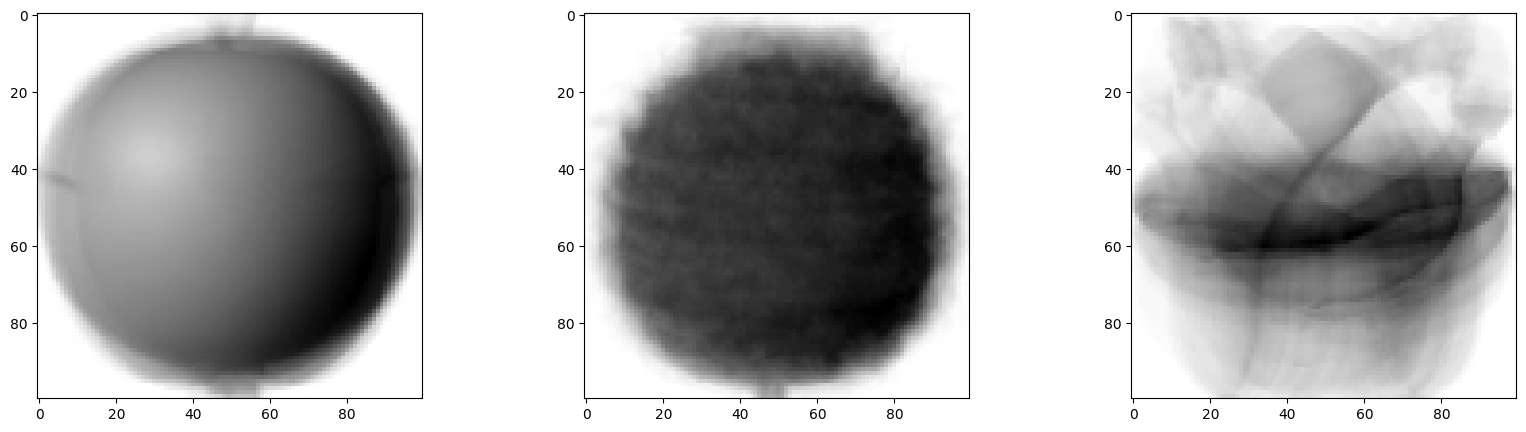

In [21]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(apple_mean, cmap="gray_r")
ax[1].imshow(pineapple_mean, cmap="gray_r")
ax[2].imshow(banana_mean, cmap="gray_r")

plt.show()

## 군집 알고리즘

In [22]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
abs_diff.shape, abs_mean.shape

((300, 100, 100), (300,))

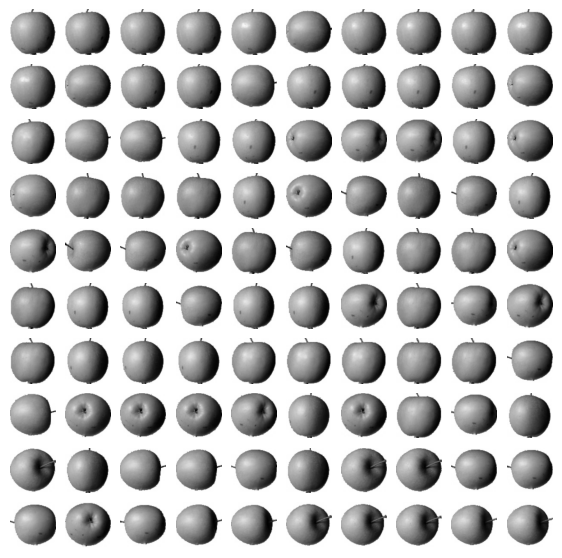

In [23]:
apple_index = np.argsort(abs_mean)[:100] # apple_mean과 오차가 가장 작은 원소 100개 순으로 정렬
fig, ax = plt.subplots(10, 10, figsize=(7, 7))
for i in range(10):
  for j in range(10):
    ax[i, j].imshow(fruits[apple_index[10*i+j]], cmap="gray_r")
    ax[i, j].axis("off")
plt.show()

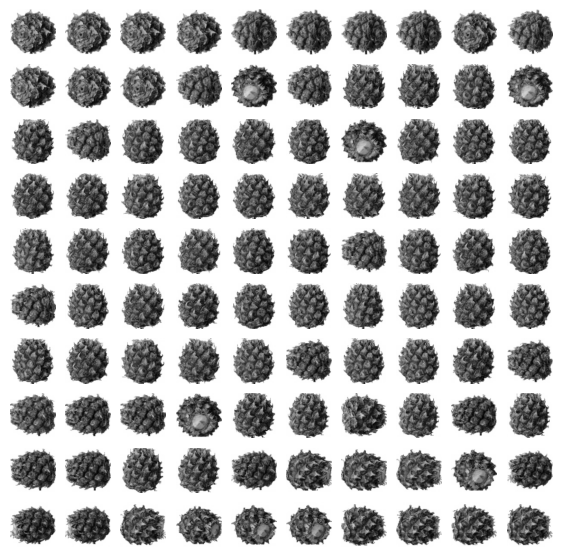

In [24]:
apple_index = np.argsort(abs_mean)[100:200] # apple_mean과 오차가 가장 작은 원소 100개 순으로 정렬
fig, ax = plt.subplots(10, 10, figsize=(7, 7))
for i in range(10):
  for j in range(10):
    ax[i, j].imshow(fruits[apple_index[10*i+j]], cmap="gray_r")
    ax[i, j].axis("off")
plt.show()

In [25]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
abs_mean.shape

(300,)

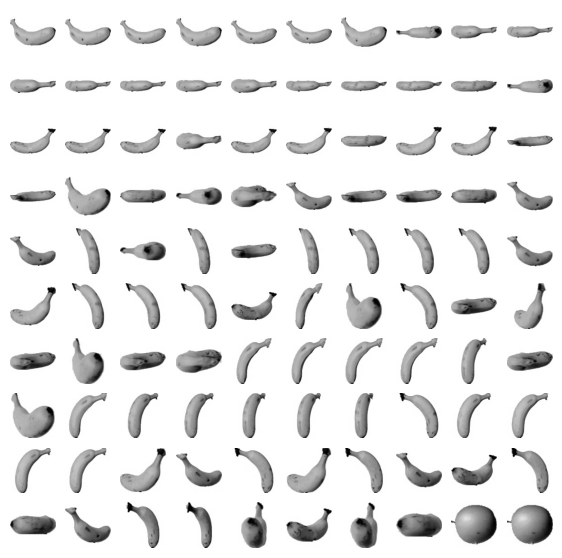

In [26]:
banana_index = np.argsort(abs_mean)[:100]

fig, ax = plt.subplots(10, 10, figsize=(7, 7))
for i in range(10):
  for j in range(10):
    ax[i, j].imshow(fruits[banana_index[10*i+j]], cmap="gray_r")
    ax[i, j].axis("off")
plt.show()

# Second

## K-Mean

In [27]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2025-10-30 04:36:44--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-10-30 04:36:44--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-10-30 04:36:44--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [28]:
import numpy as np

In [29]:
fruits = np.load("fruits_300.npy")
fruits.shape

(300, 100, 100)

In [30]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [31]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [32]:
km.labels_ # 클러스터 번호들로 라벨링. 꼭 사과가 0번 클러스터로 배정되는거 아님.

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [33]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [34]:
import matplotlib.pyplot as plt

In [35]:
def draw_fruits(arr: np.ndarray, ratio=1):
  n = len(arr)
  rows = n//10 + 1
  if rows < 2:
    cols = n
  else:
    cols = 10
  fig, ax = plt.subplots(
      rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False
  )
  for i in range(rows):
    for j in range(cols):
      if 10*i+j < n:
        ax[i, j].imshow(arr[10*i+j], cmap="gray_r")
      ax[i, j].axis("off")
  plt.show()

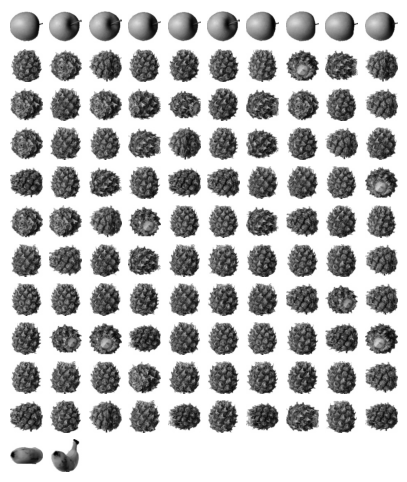

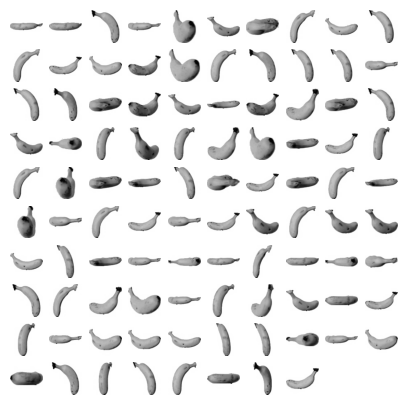

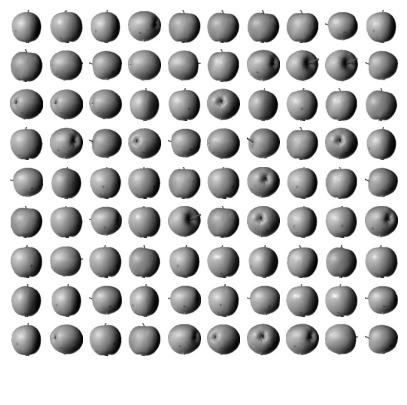

In [36]:
draw_fruits(fruits[km.labels_==0], ratio=0.5)
draw_fruits(fruits[km.labels_==1], ratio=0.5)
draw_fruits(fruits[km.labels_==2], ratio=0.5)

In [37]:
km.cluster_centers_.shape # KMeans가 최종적으로 찾은 클러스터 중심.

(3, 10000)

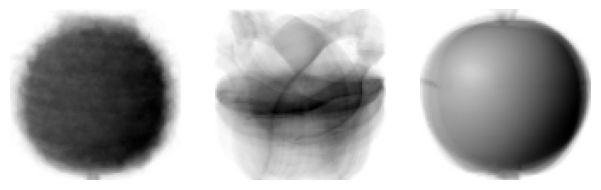

In [38]:
draw_fruits(
    km.cluster_centers_.reshape(-1, 100, 100), ratio=2.5
)

In [39]:
km.transform(
    fruits_2d[100:101] # 100번째 데이터와 클러스터간의 거리 계산
    # 파인애플 담당 클러스터와 가장 가까움.
    # !!!!!!!!!이때, 인덱싱이 아니라 슬라이싱을 해야한다!!!!!!!!!!!
)

array([[3400.24197319, 8837.37750892, 5279.33763699]])

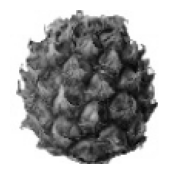

array([0], dtype=int32)

In [40]:
draw_fruits(fruits[100:101], ratio=2)
km.predict(
    fruits_2d[100:101]
)

### Finding best k parameter.

Using inertia value.

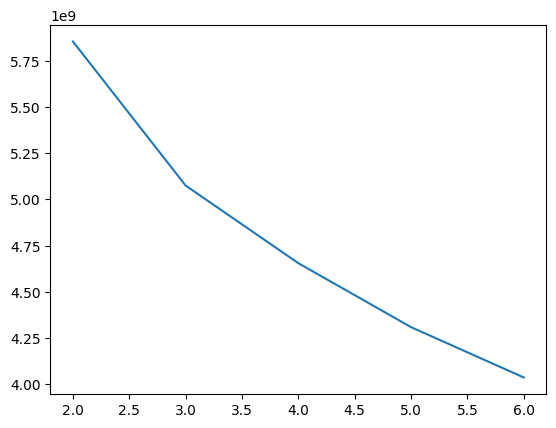

In [41]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.show()

# Third

In [42]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2025-10-30 04:36:52--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-10-30 04:36:52--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-10-30 04:36:52--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [43]:
import numpy as np
fruits = np.load("./fruits_300.npy")
fruits.shape

(300, 100, 100)

In [44]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [47]:
pca.components_.shape

(50, 10000)

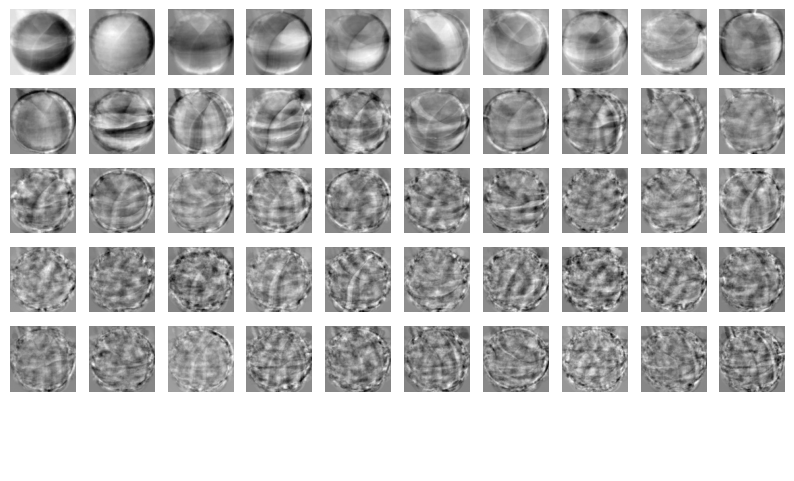

In [50]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [52]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

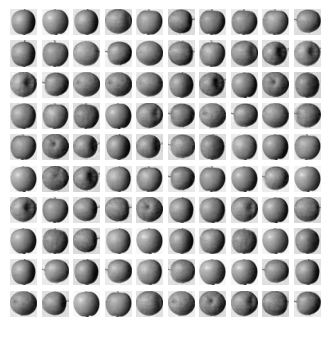

----------


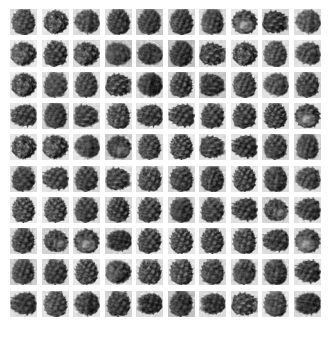

----------


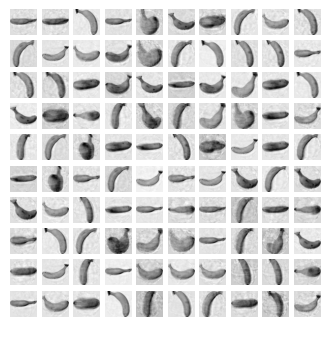

----------


In [60]:
fruits_reconstructed = pca.inverse_transform(fruits_pca)
fruits_reconstructed = fruits_reconstructed.reshape(-1, 100, 100)
for i in range(3):
  draw_fruits(
      fruits_reconstructed[100*i:100*(i+1)], 0.4
  )
  print("-"*10)

In [65]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9215829418139722)

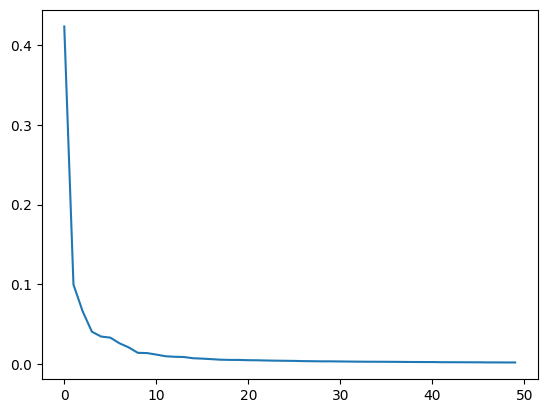

In [67]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 분류기와 활용

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)

In [72]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
np.mean(scores["test_score"]), np.mean(scores["fit_time"])

(np.float64(0.9966666666666667), np.float64(1.5840085983276366))

In [74]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores["test_score"]), np.mean(scores["fit_time"]) # 정확도는 거의 비슷한데 학습 시간이 비약적으로 적어짐.

(np.float64(0.9966666666666667), np.float64(0.04062356948852539))

In [77]:
pca = PCA(n_components=0.5) # 설명된 분산의 50% 에 달하는 분산을 찾도록 함.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [81]:
pca.n_components_

np.int64(2)

In [82]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [83]:
scores = cross_validate(lr, fruits_pca, target)
np.mean(scores["test_score"]), np.mean(scores["fit_time"])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(np.float64(0.99), np.float64(0.030865573883056642))

In [84]:
from sklearn.cluster import KMeans

In [86]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

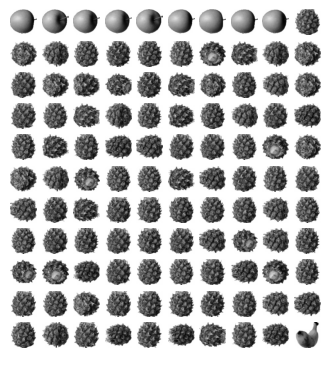

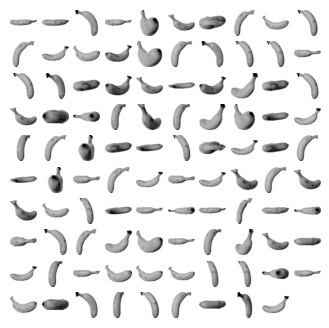

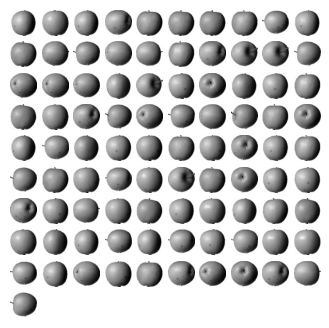

In [88]:
for label in range(3):
  draw_fruits(
      fruits[km.labels_==label], ratio=0.4
  )
  print()

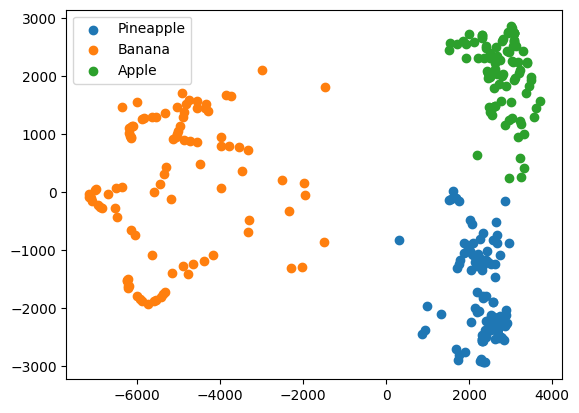

In [90]:
for label in range(3):
  data = fruits_pca[km.labels_==label] # 클러스터가 예측한 라벨을 시각화해보기
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(["Pineapple", "Banana", "Apple"])
plt.show()